# Feature Engineering

## Что такое пропущенные значения
Аналитикам часто приходится работать с данными, в которых есть пропуски. Более того, в реальных данных пропуски сплошь и рядом.

Когда могут появиться пропуски в данных? Например, если мы делаем опрос, люди могут просто не ответить на какие-то из вопросов. В этих местах появляется пропуск. Еще один пример — отправляем данные по протоколу UDP, часть данных теряется — снова пропуски. Ну и самый банальный случай — программа заглючила и не записала часть данных :).

Чтобы программа правильно интерпретировала пропуски, при чтении файла с помощью метода read_csv можно передать в параметр na_values значение или список значений, которые при чтении будут помечены как пропуски.

## Какие бывают пропуски
Вот список значений, которые по умолчанию считаются как пропуски: '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null'.  

Посмотрите внимательно на список значений выше: можно заметить, что первым значением в списке является пустая строка '' - это именно тот случай, когда значения в данных просто нет.

In [1]:
import pandas as pd

In [2]:
users_df = pd.read_csv('users.csv', sep='\t', encoding='KOI8-R')

In [3]:
users_df.head()

,Юзверь,мейл,Гео
0,User_943,Accumanst@gmail.com,Ижевск
1,User_908,Advismowr@mail.ru,Ижевск
2,User_962,Anachso@ukr.net,Краснодар
3,User_973,Antecia@inbox.ru,Пермь
4,User_902,Balliaryva@ukr.net,NaN


In [4]:
users_df.columns = ['user_id', 'email', 'geo']

In [5]:
users_df.head()

,user_id,email,geo
0,User_943,Accumanst@gmail.com,Ижевск
1,User_908,Advismowr@mail.ru,Ижевск
2,User_962,Anachso@ukr.net,Краснодар
3,User_973,Antecia@inbox.ru,Пермь
4,User_902,Balliaryva@ukr.net,NaN


In [6]:
log_df = pd.read_csv('log.csv', header=None)

In [7]:
log_df.head()

,0,1,2,3
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,NaN,NaN
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,NaN,NaN
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,NaN,NaN
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,NaN,NaN
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,NaN,NaN


In [8]:
log_df.columns = ['user_id', 'time', 'bet', 'win']

In [9]:
log_df.head()

,user_id,time,bet,win
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,NaN,NaN
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,NaN,NaN
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,NaN,NaN
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,NaN,NaN
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,NaN,NaN


## Как найти пропуски
В pandas есть метод `isna()`, который возвращает таблицу такой же размерности, что и на вход, но значения в ней - True или False. True, если данное значение является пропуском, и False в ином случае.

In [10]:
log_df.head().isna()

,user_id,time,bet,win
0,False,False,True,True
1,False,False,True,True
2,False,False,True,True
3,False,False,True,True
4,False,False,True,True


Зачем нам смотреть на эту таблицу? На самом деле, незачем, но с помощью нее можно делать полезные вещи. Например, считать количество пропусков и работать с ними, чем мы и займемся дальше.

В numpy пропущенные значения могут быть записаны как специальный объект np.nan, что означает Not a Number.

Проверить на наличие таких значений можно с помощью np.isnan().

P.S. Если вы все-таки хотите посмотреть на красивую (и, возможно, полезную) визуализацию пропущенных значений - обратите внимание на библиотеку [missingno](https://github.com/ResidentMario/missingno).

#### Посчитайте количество пропусков в столбце time. Метод isna() есть не только у DataFrame, но и у Series. Это значит, что применять его можно не только ко всей таблице, но и к каждому столбцу отдельно.

In [11]:
len(log_df[log_df['time'].isna()])

15

## Удаление пропусков
Пропуски можно удалять автоматически. Во многих случаях это правильно, так как данные с большим количеством пропусков часто не имеют смысла и не приносят никакой пользы.  

Удалять данные с пропусками можно с помощью метода `dropna()`.

Параметр `axis` в методе `dropna()` говорит методу, по какой оси удалять значения.  

Если нужно удалить строки, в которых встречается пропуск `(NaN)`, следует указать `axis=0`.  Зачем это делать? Например, у нас из 1000 примеров данных про пользователей пропуски есть в пяти. Разумно их удалить, так как их количество пренебрежимо мало.
Если нужно удалить столбцы, в которых встречается пропуск `(NaN)`, нужно указывать `axis=1`. Зачем? Иногда в одном конкретном столбце пропусков настолько много, что с ними просто не хочется возиться - смысла в них все равно почти нет. 
Еще один интересный параметр - `subset`. Что он делает? Если передать в него список значений по одной оси (например, названия столбцов) и задать при этом в параметре `axis` другую ось (в нашем случае 0), то мы удалим те строки, для которых в данных столбцах находится пропуск. То же самое работает и наоборот: нужно поменять `axis` на 1 и вместо названий столбцов передавать индексы строк.

Перед удалением строк обязательно сделайте бэкап.

#### Удалите все столбцы, где есть пропуски. Запишите в поле, сколько осталось столбцов в данных после этого.

Используйте оригинальный датасет log.csv.

In [12]:
log_df.dropna(axis=1)

,user_id
0,Запись пользователя № - user_919
1,Запись пользователя № - user_973
2,Запись пользователя № - user_903
3,Запись пользователя № - user_954
4,Запись пользователя № - user_954
...,...
995,Запись пользователя № - user_984
996,#error
997,#error
998,#error


#### Удалите все строки, где есть пропуски. Запишите в поле, сколько осталось строк в данных после этого.

Используйте оригинальный датасет log.csv.

In [13]:
log_df.dropna(subset=['time', 'bet', 'win'])

,user_id,time,bet,win
14,Запись пользователя № - user_917,[2019-01-02 8:57:36,145732.0,1987653.0
29,Запись пользователя № - user_942,[2019-01-04 13:59:42,1678321.0,9876543.0
151,Запись пользователя № - user_982,[2019-01-16 21:54:22,100.0,4749.0
189,Запись пользователя № - user_964,[2019-01-21 18:34:44,200.0,4667.0
205,Запись пользователя № - user_931,[2019-01-22 5:26:59,300.0,4319.0
...,...,...,...,...
967,Запись пользователя № - user_975,[2019-04-19 22:25:15,1000.0,6108.0
971,Запись пользователя № - user_912,[2019-04-20 10:35:49,10554.0,31799.0
972,Запись пользователя № - user_926,[2019-04-20 10:35:50,10354.0,30244.0
976,Запись пользователя № - user_970,[2019-04-20 10:35:54,10354.0,30691.0


Ответ 133

## Как удалить простые дубли
В pandas есть метод для удаления дублей (дубликатов) - drop_duplicates(). Он просто удаляет повторяющиеся строки:

```
import pandas as pd  
df = pd.read_csv('data.csv')
df.drop_duplicates()  
```
У данного метода тоже есть параметр subset, в этом случае нужно передавать список содержащий названия столбцов.  

#### Удалите дубли среди столбцов user_id и time. Запишите в поле ниже, сколько осталось строк после удаления дублей.

Используйте оригинальный датасет log.csv.

In [14]:
log_df.drop_duplicates(subset=['user_id', 'time'])

,user_id,time,bet,win
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,NaN,NaN
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,NaN,NaN
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,NaN,NaN
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,NaN,NaN
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,NaN,NaN
...,...,...,...,...
991,Запись пользователя № - user_965,[2019-04-20 12:55:41,800.0,6927.0
992,Запись пользователя № - user_967,[2019-04-20 14:59:36,10154.0,NaN
993,Запись пользователя № - user_973,[2019-04-20 17:09:56,10254.0,NaN
994,Запись пользователя № - user_977,[2019-04-20 18:10:07,10354.0,NaN


Ответ 986

#### Уберите лишний символ, преобразуйте признак time к datetime. После этого найдите наибольшую дату и выведите ее без времени.
Подсказка: можно применить метод max() к получившемуся столбцу со временем.

Не забудьте избавиться от пропусков.

Запишите ответ в формате "YYYY-MM-DD".

In [15]:
def correct_time(time):
    if len(str(time)) > 3:
        return time[1:]
    else:
        return time

log_df['time'] = log_df['time'].apply(correct_time)

log_df['time'] = pd.to_datetime(log_df['time'], format='%Y-%m-%d %H:%M:%S')

In [16]:
log_df['time'].max()

Timestamp('2019-04-20 18:10:07')

Ответ 2019-04-20

## Извлечение признаков времени

- year: возвращает год
- month: возвращает месяц
- day: возвращает день
- hour, minute, second - час, минута, секунда
- dayofweek - день недели, от 0 до 6, где 0 - понедельник, 6 - воскресенье

Кроме них, есть и другие интересные атрибуты, советуем посмотреть [здесь](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html).

In [17]:
log_df['time'].apply(lambda x: x.year)  

0      2019.0
1      2019.0
2      2019.0
3      2019.0
4      2019.0
        ...  
995    2019.0
996       NaN
997       NaN
998       NaN
999       NaN
Name: time, Length: 1000, dtype: float64

Библиотека pandas позволяет использовать аксессор **dt** для упрощения подобной работы:

In [18]:
log_df['time'].dt.year

0      2019.0
1      2019.0
2      2019.0
3      2019.0
4      2019.0
        ...  
995    2019.0
996       NaN
997       NaN
998       NaN
999       NaN
Name: time, Length: 1000, dtype: float64

Аксессор - это атрибут столбца, который хранит переменные типа Timestamp, то есть переменные, которые были строковым представлением времени, а затем изменены с помощью pd.to_datetime(). Если вы попытаетесь обратиться к dt у столбца, в котором лежит что-то отличное от времени, вы получите ошибку.

Чуть больше можно увидеть [здесь](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) (не забудьте посмотреть в исходный код).

#### Найдите минуту, которая встречалась в данных чаще всего. Введите ответ в поле ниже.

In [19]:
log_df['time'].dt.minute.value_counts().index[0]

36.0

Ответ 36

#### Найдите месяц, который встречался в данных реже всего. Введите ответ в поле ниже.

In [20]:
log_df['time'].dt.month.value_counts(ascending=True).index[0]

4.0

Ответ 4

Просто, не так ли?

В реальности мы используем эти же методы для получения более интересных вещей из данных.

Новые интересные знания, которые получаются из данных, мы называем `инсайтами (insights)`.

Следующие пара заданий позволят нам получить результаты, которые можно называть инсайтами и которые могут принести реальную пользу.

#### Посчитайте, сколько дней в данных являются выходными (то есть субботой или воскресеньем). Введите ответ в поле ниже.

In [21]:
log_df['time'].dt.dayofweek.apply(lambda x: 1 if x == 5 or x == 6 else 0).sum()

283

Ответ 283

#### Посчитайте, какое время дня встречается в данных реже всего. Введите ответ в поле ниже: ночь, утро, день или вечер.

Договоримся, что с 0 до 5 часов - ночь, с 6 до 11 - утро, с 12 до 17 - день, с 18 до 23 - вечер.

Важно: для выполнения задания вам нужно будет избавиться от пропусков только в столбце time. Вспомните, как избавиться от пропусков только по конкретному признаку.

In [22]:
def day_period(h):
    if h >= 0 and h <= 5:
        return 'ночь'
    elif h >= 6 and h <= 11:
        return 'утро'
    elif h >= 12 and h <= 17:
        return 'день'
    else:
        return 'вечер'
        

log_df['time'].dropna().dt.hour.apply(day_period).value_counts(ascending=True)

вечер    227
день     240
утро     253
ночь     265
Name: time, dtype: int64

Ответ: вечер

#### Давайте повторим то, что мы прошли в этой секции. Напишите код, который создаст признак hour из признака time в датасете log.csv. Для этого:

1. загрузите датасет log.csv в переменную log, дальше работать будем с ней;

2. установите имена столбцов: ['user_id', 'time', 'bet', 'win'];

3. избавьтесь от пропусков в log;

4. приведите переменную time к подходящему для извлечения признаков виду;

5. получите значение часа для каждой строки в переменной time и запишите в столбец hour в log.

Результатом будет таблица log со столбцом hour внутри.

In [23]:
import pandas as pd
log = pd.read_csv('log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log = log.dropna()
log['time'] = log['time'].apply(lambda x: x[1:])  
log['time'] = pd.to_datetime(log['time'])  
log['hour'] = log['time'].dt.hour
log

,user_id,time,bet,win,hour
14,Запись пользователя № - user_917,2019-01-02 08:57:36,145732.0,1987653.0,8
29,Запись пользователя № - user_942,2019-01-04 13:59:42,1678321.0,9876543.0,13
151,Запись пользователя № - user_982,2019-01-16 21:54:22,100.0,4749.0,21
189,Запись пользователя № - user_964,2019-01-21 18:34:44,200.0,4667.0,18
205,Запись пользователя № - user_931,2019-01-22 05:26:59,300.0,4319.0,5
...,...,...,...,...,...
967,Запись пользователя № - user_975,2019-04-19 22:25:15,1000.0,6108.0,22
971,Запись пользователя № - user_912,2019-04-20 10:35:49,10554.0,31799.0,10
972,Запись пользователя № - user_926,2019-04-20 10:35:50,10354.0,30244.0,10
976,Запись пользователя № - user_970,2019-04-20 10:35:54,10354.0,30691.0,10


## Еще немного о пропусках
Ранее мы говорили о пропусках - местах в данных, где по какой-то причине ничего нет.

Что мы делали с пропусками? Удаляли их.

На самом деле, удаление пропусков - довольно грубое решение, потому что мы можем случайно выбросить что-то полезное. Например, у вас есть данные о людях: пол, возраст, цвет глаз, город. При этом для большинства людей не записан цвет глаз. Удалять строки с пропусками может быть неудачным решением -  у нас почти не останется данных. Удалить столбец с цветом глаз - решение получше. Возможно, есть решение еще лучше - например, заполнить все пропуски цветом глаз "карие". Ответ на вопрос "Правильно ли будет так сделать?" можно получить после уточнения информации: в каких-то странах преобладает один цвет глаз, в каких-то - другой.

Поэтому довольно часто можно заполнить пропуски, сделав некоторые обоснованные предположения.

Сейчас мы познакомимся с самым простым способом заполнять пропуски - заполнением константой.

каждый пропуск в столбце мы заполним одним и тем же числом.

Почему мы вообще говорим о заполнении пропусков вместо того, чтобы просто удалить их? Потому что после удаления пропусков у нас останется слишком мало данных, а нам хочется получить какие-то инсайты из них.

## Заполнение константой
Что такое константа? Это просто число.

Посмотрим на признак bet в наших данных (log.csv).

"Bet" означает "ставка".  Некоторые значения в данных заполнены цифрами - поэтому мы можем сделать предположение, что это сумма в рублях, т.е. ставка. 

Можно также предположить, что если в данных в этом месте пропуск - значит, человек не делал ставку. Другими словами, ставка в данном случае равна 0.

Чтобы заполнить пропуски в столбце каким-то значением, можно использовать метод `fillna()` у самого столбца. Аргументом этого метода будет число, которое появится на месте пропусков.

Например:
```python
    log['bet'].fillna(0)
```

В задании ниже вы заполните пропуски нулями. Почему бы просто не удалить строки с пропусками?

Дело в том, что в данном случае, скорее всего ,пропуски что-то означают. А именно, они означают (по крайней мере, мы это предполагаем), что человек приходил, но не делал ставку. Иначе говоря, ставка человека в этом случае равна 0.

Если мы удалим все строки с пропусками, останутся только строки, где ставка положительная. Это было бы нелогично, так как получится, что каждый пришедший в букмекерскую контору человек делает ставку. Иногда люди заходят просто посмотреть :)

#### Посчитайте, сколько раз люди приходили, но не делали ставок. Для этого заполните пропуски в столбце bet значением 0 и посчитайте количество таких значений.

In [24]:
log = pd.read_csv('log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'] = log['bet'].fillna(0)

In [25]:
len(log[log['bet'] == 0])

515

Ответ: 515

## Заполнение с помощью функции

Теперь поработаем с признаком win, в котором тоже есть пропуски.

Иногда нужно заполнять пропуски не одним и тем же числом, а разными, в зависимости от какого-то условия. Перед нами именно этот случай.

Предположим, что если в признаке win находится пропуск, то выигрыша не было. Здесь два возможных случая:

- Человек не делал ставки и ничего не выиграл. То есть просто пришел, посмотрел и ушел.
- Человек делал ставку, но не выиграл. Значит, выигрыш на самом деле является отрицательным значением - это проигрыш.

Предлагаем вам написать метод, который заполнит пропуски в признаке win в соответствии с предположением выше. 

Для этого можно применить метод apply() ко всей таблице и передать ему функцию, которая вычисляет размер выигрыша (или проигрыша) по следующей схеме:

- Если значение в столбце win существует (не пропуск) - вернуть это же значение. Это значит, что человек выиграл.
- Если вместо значения в столбце win пропуск, вернуть 0.

На выходе получится столбец без пропусков. Следующим шагом будет замена старого столбца win на новый.

#### Посчитайте, сколько раз участники ставок проиграли деньги. То есть посчитайте количество строк, для которых в столбце win находится отрицательное значение.

In [26]:
def final_win(row):
    if row['win'] == 0 and row['bet'] > 0:
        return -row['bet']
    else:
        return row['win']


log = pd.read_csv('log.csv', header=None)

log.columns = ['user_id', 'time', 'bet', 'win']

log['bet'] = log['bet'].fillna(0)
log['win'] = log['win'].fillna(0)

log['win'] = log.apply(final_win, axis=1)

len(log[log['win'] < 0])

347

Ответ 347

#### Создайте признак net, хранящий сумму выигрыша с учетом ставки. Для этого используйте следующий алгоритм:
- если значение признака win меньше 0 - присвоить значение признака win признаку net;

- во всех остальных случаях - из значения признака win вычтите значение признака bet и полученное значение присвойте признаку net.

После этого посчитайте, у скольких людей выигрыш положительный.

In [27]:
log['net'] = log.apply(lambda row: row['win'] if row['win'] < 0 else row['win'] - row['bet'], axis=1)
log.head(10)

,user_id,time,bet,win,net
0,Запись пользователя № - user_919,[2019-01-01 14:06:51,0.0,0.0,0.0
1,Запись пользователя № - user_973,[2019-01-01 14:51:16,0.0,0.0,0.0
2,Запись пользователя № - user_903,[2019-01-01 16:31:16,0.0,0.0,0.0
3,Запись пользователя № - user_954,[2019-01-01 17:17:51,0.0,0.0,0.0
4,Запись пользователя № - user_954,[2019-01-01 21:31:18,0.0,0.0,0.0
5,Запись пользователя № - user_917,[2019-01-01 23:34:55,156789.0,-156789.0,-156789.0
6,Запись пользователя № - user_900,[2019-01-01 4:37:25,0.0,0.0,0.0
7,Запись пользователя № - user_980,[2019-01-01 6:31:23,0.0,0.0,0.0
8,Запись пользователя № - user_906,[2019-01-02 10:57:08,0.0,0.0,0.0
9,Запись пользователя № - user_952,[2019-01-02 16:55:06,0.0,0.0,0.0


In [28]:
len(log[log['net'] > 0])

138

Ответ: 138

#### Посчитайте среднее значение выигрыша (из столбца net) в тех случаях, когда выигрыш больше 0. Результат округлите до целого, отбросив дробную часть.

In [29]:
log[log['net'] > 0]['net'].mean()

80253.33333333333

Ответ: 80253

#### Посчитайте медианное значение выигрыша (из столбца net) в тех случаях, когда выигрыш больше 0. Результат округлите до целого, отбросив дробную часть.

`Подсказка: можно использовать median().`

In [30]:
log[log['net'] > 0]['net'].median()

5347.0

Ответ: 5347

## Подумайте о mean и median
Проанализируйте результаты двух предыдущих заданий.

Одинаковые получились значения или разные? Почему?

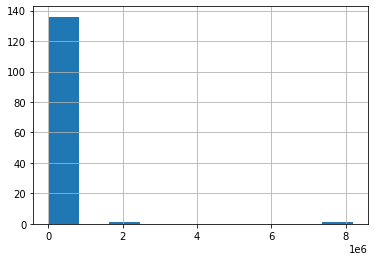

In [31]:
log[log['net'] > 0]['net'].hist()

In [32]:
q1 = log[log['net'] > 0]['net'].quantile(q=0.25)

In [33]:
q3 = log[log['net'] > 0]['net'].quantile(q=0.75)

In [34]:
IQR = q3 - q1

In [35]:
x1 = q1 - 1.5*IQR
x2 = q3 - 1.5*IQR

print('[{}, {}]'.format(x1, x2))

[2511.625, 3952.875]


In [36]:
log[log['net'].between(x1, x2)]['net'].median()

3714.0

In [37]:
log[log['net'].between(x1, x2)]['net'].mean()

3700.5

Большая разность между mean и median из-за выбросов. После отброса выбросов, можно видеть что значения mean и median близки.

## Теперь мы посмотрим, сколько в среднем люди выигрывают и проигрывают.

При модификации датасета log.csv, пропущенные значения в столбцах bet и win замените на 0, cоздайте столбец net, хранящий сумму выигрыша с учетом ставки (для этого из столбца win поэлементно вычтите столбец bet и запишите в новый столбец).

#### Посчитайте, какой процент посещений букмекерской конторы оборачивался ставкой.
Для этого поделите количество ставок (значений больше 0) на общее количество посещений конторы. Результат округлите до одного знака после запятой.

In [38]:
log = pd.read_csv('log.csv', header=None)

log.columns = ['user_id', 'time', 'bet', 'win']

log['bet'] = log['bet'].fillna(0)
log['win'] = log['win'].fillna(0)
log['net'] = log['win'] - log['bet']

In [39]:
len(log[log['bet'] > 0]) / len(log) * 100

48.5

Ответ: 48.5

#### Посчитайте среднее значение ставки (из столбца bet) в тех случаях, когда ставка была сделана. Запишите результат, отбросив дробную часть.

In [40]:
log[log['bet'] > 0]['bet'].mean()

6785.738144329897

Ответ: 6785

#### Посчитайте средний выигрыш (из столбца net) в тех случаях, когда ставка была сделана. Результат округлите до целого, отбросив дробную часть.
Пояснение: выигрыш в данном случае означает изменение количества денег и может быть отрицательным. В таком случае это проигрыш.

In [41]:
log[log['bet'] > 0]['net'].mean()

20421.892783505155

Ответ: 20421

#### Посчитайте среднюю сумму потерь при проигрыше (из столбца net). Результат округлите до целого, отбросив дробную часть.
Пояснение: ответ должен быть дан в виде отрицательного числа.

In [42]:
log[log['net'] < 0]['net'].mean()

-3372.743515850144

Ответ: -3372

#### Посчитайте, какой процент ставок заканчивается выигрышем, а какой - проигрышем. Сравните эти значения и ответьте, какое из них больше.

In [43]:
win = len(log[(log['bet'] > 0) & (log['net'] > 0)]) / len(log) * 100
loss = len(log[(log['bet'] > 0) & (log['net'] < 0)]) / len(log) * 100

print('Win: {} %, Loss: {} %'.format(round(win, 1), round(loss, 1)))

Win: 13.8 %, Loss: 34.7 %


#### Напишите код, который узнает, чему была равна минимальная ставка и сколько людей сделали такую ставку. 
Для этого:

1. загрузите датасет log.csv;

2. посчитайте, чему равна минимальная ставка;

3. посчитайте, сколько раз была сделана минимальная ставка, и запишите результат в переменную min_bet_amount в виде целого числа.

In [44]:
log = pd.read_csv('log.csv', header=None)
log.columns = ['user_id', 'time', 'bet', 'win']
log['bet'] = log['bet'].fillna(0)
log['win'] = log['win'].fillna(0)
min_bet = log[log['bet'] > 0]['bet'].min()
min_bet_amount = len(log[log['bet'] == min_bet])
min_bet_amount

48

Ответ: 48

## merge/groupby

In [45]:
# Приведем признак user_id к одному формату в обоих датасетах
users_df['user_id'] = users_df['user_id'].apply(lambda x: x.lower())

In [46]:
# Загрузим и подготовим новую базу
log_df = pd.read_csv('log.csv', header=None)

log_df.columns = ['user_id', 'time', 'bet', 'win']

log_df['bet'] = log_df['bet'].fillna(0)
log_df['win'] = log_df['win'].fillna(0)

log_df['time'] = log_df['time'].apply(lambda x: x[1:] if not pd.isna(x) else x)  
log_df['time'] = pd.to_datetime(log_df['time']) 

log_df['net'] = log_df.apply(lambda row: row['win'] - row['bet'], axis=1)

# Избавимся от ошибок в user_id
log_df = log_df[log_df['user_id'] != '#error']

log_df['user_id'] = log_df['user_id'].str.split(' - ').apply(lambda x: x[1])

Это будет нужно для того, чтобы объединить оба датасета и работать с едиными данными для проведения продвинутого анализа.

## Merge

Теперь объединим данные с помощью метода `pd.merge()`.

Первые два аргумента - таблицы, которые нужно будет объединить.

Третий аргумент - название признака, по которому будем объединять данные. Мы уже привели данные к одинаковому виду, и теперь их можно объединить по признаку 'user_id', чтобы получить полную информацию о пользователе. 

In [47]:
merged_df = pd.merge(users_df, log_df, on='user_id')

In [48]:
len(merged_df)

975

## Groupby

Данный метод позволяет сгруппировать данные и применить к ним методы агрегации:

In [49]:
merged_df.groupby('user_id')['win'].median().median()

0.0

В данном случае мы группируем данные по признаку `user_id`.

После этого мы в каждой группе выбираем признак `win`.

Затем мы берем медиану каждой группы по признаку win и на выходе получаем таблицу, в которой индексом является признак `user_id`. В этой таблице единственный столбец - медиана по каждой группе (то есть по каждому пользователю).

Наконец, последний вызов `median()` дает нам медиану по предыдущему столбцу, то есть возвращает одно число.

## Анализ по пользователям

Мы собрали все, что нам нужно, чтобы извлечь какие-то инсайты из данных о пользователях.

`pd.merge()` нам больше не понадобится, теперь будем пользоваться возможностями `groupby`.

Используйте датасет, который получился в результате всех преобразований выше (в том числе, заполнение пропусков). Ответ запишите в поле ниже в виде целого числа (отбросьте дробную часть).

#### Посчитайте медиану баланса по каждому пользователю. Для этого сгруппируйте по пользователям, возьмите признак net, просуммируйте по каждому пользователю и получите медиану.

In [50]:
merged_df.groupby('user_id')['net'].sum().median()

1986.0

Ответ: 1986

#### Сколько раз в среднем каждый человек приходит, не делая ставок, при условии, что у этого человека все-таки есть хотя бы одна ставка?
Например: Человек посетил букмекерскую контору 5 раз из них 1 раз сделал ставку, 4 раза нет - условие выполняется. Человек посетил букмекерскую контору 5 раз из них ни разу ставку не сделал - условие не выполняется. Для того, чтобы узнать это, просуммируйте в каждой группе количество записей со ставкой, равной 0, и поделите на общее количество групп. Если при этом в группе нет записей со ставкой больше 0, считаем количество записей в данной группе равным 0.

In [51]:
grouped = merged_df.groupby('user_id')

zero_bets = grouped['bet'].agg(
    cond = lambda x: (x.where(x == 0).count() > 0 and x.where(x > 0).count() > 0) or (x.where(x > 0).count() == len(x)),
    count = lambda x: x.where(x == 0).count()
)

zero_bets[zero_bets['cond']]['count'].mean()

5.05

#### Сколько в среднем времени проходит между появлением человека в сервисе и первой ставкой?

Считать нужно только тех, кто делал ставку. Для того, чтобы узнать это, напишите метод, считающий минимальное время среди ставок, равных 0, и минимальное время среди ставок больше 0. После этого верните разницу между вторым и первым числом. Пройдитесь по всем группам в цикле. Если в группе нет ставок больше 0, пропустите эту группу. Просуммируйте разницу во времени для каждой группы (с помощью метода, описанного выше) и поделите на количество групп, которые вы не пропустили.

In [52]:
def get_time_interval(row):
    time1 = row[row['bet'] == 0]['time'].min()
    time2 = row[row['bet'] > 0]['time'].min()
    
    return (time2 - time1).days if time2 > time1 else 0

In [53]:
grouped.apply(get_time_interval).mean()

46.6

Ответ: 46 дней

## Анализ по городам

Мы получили важные инсайты про пользователей.

Теперь посмотрим, какую информацию мы можем извлечь из информации о городах.

Будем использовать те же данные, что и в начале прошлой секции. 

#### Наибольший суммарный выигрыш среди всех городов имеет Москва. Посчитайте следующий за ней город.
Для этого сгруппируйте по городам, возьмите признак win, просуммируйте по каждому городу, отсортируйте и получите второй город.

In [54]:
grouped_by_geo = merged_df.groupby('geo')

In [55]:
grouped_by_geo['win'].sum().sort_values(ascending=False)

geo
Москва             11959741.0
Воронеж              184338.0
Санкт-Петербург      151007.0
Казань                97806.0
Ярославль             97441.0
Ижевск                84895.0
Красноярск            84767.0
Арзангелтск           74375.0
Пермь                 67734.0
Хабаровск             65459.0
Краснодар             62718.0
Ставрополь            46003.0
Екатеринбург          36682.0
Тюмень                 4701.0
Name: win, dtype: float64

Ответ: Воронеж

#### Во сколько раз различаются максимальное и минимальное значение средней ставки по городам?
Для того, чтобы это посчитать, нужно сгруппировать по городам, взять среднее от признака bet, найти максимальное и минимальное значения, затем поделить одно на другое.

In [56]:
grouped_by_geo = merged_df[merged_df['bet'] > 0].groupby('geo')

In [57]:
mean_in_cities = grouped_by_geo['bet'].mean()

In [58]:
mean_in_cities.max() / mean_in_cities.min()

127.81602335164835

Ответ: 127

#### Давайте повторим все, что мы прошли в этой секции. Напишите код, который посчитает, сколько раз пользователи приходили в букмекерскую контору в каждом городе.

In [59]:
user_df = pd.read_csv('users.csv', sep='\t', encoding='KOI8-R')
user_df.columns = ['user_id', 'email', 'geo']
user_df['user_id'] = user_df['user_id'].apply(lambda x: x.lower())

log_df = pd.read_csv('log.csv', header=None)
log_df.columns = ['user_id', 'time', 'bet', 'win']
log_df = log_df[log_df['user_id'] != '#error']
log_df['user_id'] = log_df['user_id'].str.split(' - ').apply(lambda x: x[1])

merged_df = pd.merge(user_df, log_df, on='user_id')

merged_df.groupby(['geo']).apply(lambda x: x['user_id'].count())

geo
Арзангелтск         96
Воронеж             88
Екатеринбург        49
Ижевск              61
Казань              66
Краснодар           86
Красноярск          56
Москва              61
Пермь               55
Санкт-Петербург    115
Ставрополь          36
Тюмень              32
Хабаровск           60
Ярославль           89
dtype: int64

# Что мы узнали из данных?

Мы узнали несколько интересных вещей, которые могут в будущем принести бизнес-пользу.

Например: 

- Реже всего люди заходят в букмекерскую контору вечером.
- Около половины раз люди приходили, но не делали ставок.
- А те, кто делали ставки, проиграли больше чем в двух третях случаев.
- Средняя ставка и средний проигрыш примерно равны по абсолютному значению.
- Может пройти довольно много времени между первым приходом человека и первой ставкой. И за это время человек может зайти в контору еще несколько раз, не делая ставок.
- Забавный факт: второй по величине город России и второй по суммарному выигрышу на ставках город России - разные города.
- Наконец, мы поняли, что вы скорее проиграете, чем выиграете, поэтому инвестируйте в свои знания:)

## Тест:
 - Какой метод в pandas используется для поиска пропусков? - **`isna()`**
 - В методе dropna() можно удалять пропуски, двигаясь по конкретной оси. Какое значение параметра axis нужно задать, чтобы удалить все строки с пропусками? - **`axis=0`**
 - В `pandas` мы используем метод `pd.drop_duplicates()` для удаления дублей. Если мы хотим удалить дубли только по конкретным столбцам, что мы должны передать в параметр `subset`? - **Названия столбцов, которые нужно удалить**
 - Как можно превратить столбец с датами (уже преобразованными с помощью `to_datetime`) в столбец с месяцами? - **`log['time'].apply(lambda pandas_dataframe: pandas_dataframe.month)`, `log.time.dt.month`**
 - В каком порядке value_counts() сортирует значения на выходе? - **По убыванию**
 - С помощью какого метода можно заполнить пропуски константой? - **`fillna()`**
 - Зачем нужен метод merge? - **Чтобы объединить таблицы (в стиле join из SQL) по признаку в параметре `on`**
 - Зачем нужен метод groupby()? - **Метод `groupby()` нужен, чтобы сгруппировать данные по какому-то признаку, который передается как аргумент в этот метод**